In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
'''
Close is the standard choice for price-over-time charts. It's the final traded price when the market closes for the day — it represents the settled consensus
price and is what most people mean when they say "the stock was at $X."

Quick breakdown of when you'd use the others:
- Open — price at market open, useful for gap analysis (overnight moves)                                                                                            
- High/Low — intraday range, useful for volatility analysis
- Close — the go-to for trend/performance charts
'''

# Load the data from the CSV files and parse the 'Date' column as datetime objects
appl_df = pd.read_csv('../data/AAPL_data.csv', parse_dates=['Date'])
msft_df = pd.read_csv('../data/MSFT_data.csv', parse_dates=['Date'])
qqq_df = pd.read_csv('../data/QQQ_data.csv', parse_dates=['Date'])
spy_df = pd.read_csv('../data/SPY_data.csv', parse_dates=['Date'])
tsla_df = pd.read_csv('../data/TSLA_data.csv', parse_dates=['Date'])

# appl_df.plot(kind='line', x='Date', y='Close')
# plt.show()

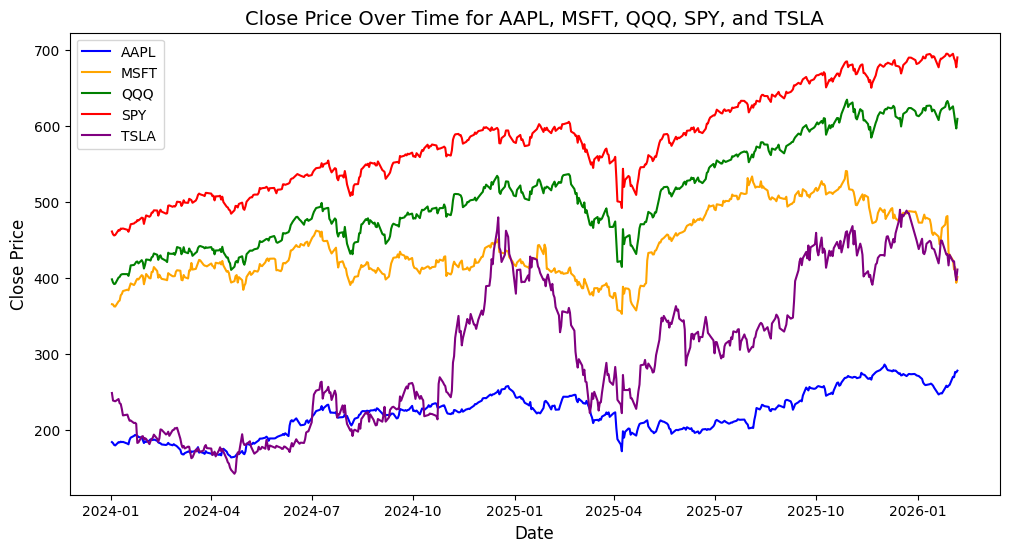

In [19]:
# Create a line plot for the 'Close' price over time for each stock
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the 'Close' price for each stock
ax.plot(appl_df['Date'], appl_df['Close'], label='AAPL', color='blue')
ax.plot(msft_df['Date'], msft_df['Close'], label='MSFT', color='orange')
ax.plot(qqq_df['Date'], qqq_df['Close'], label='QQQ', color='green')
ax.plot(spy_df['Date'], spy_df['Close'], label='SPY', color='red')
ax.plot(tsla_df['Date'], tsla_df['Close'], label='TSLA', color='purple')

# Set labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price', fontsize=12)
ax.set_title('Close Price Over Time for AAPL, MSFT, QQQ, SPY, and TSLA', fontsize=14)
ax.legend()
plt.show()

# Visualizing Volume Patterns

### What is Volume?
**Volume** = the number of shares that was traded during a specified time period (in my case, each day). High volume means lots of buying/ selling activity, low volume means quiet trading.

### Why Volume Matters
Volume gives us the context about price movements:
- High volume + price increase = Strong buying conviction (bullish signal)
- High volume + price decrease = Strong selling pressure (bearish signal)
- Low volume + price movement = Weak signal, might reverse easily
- Volume spikes = Something important happened (news, earnings, etc.)

A way to think of it: If a stock jumps 5% on 100 shares traded, that's not meaningful. But if it jumps 5% on 10 million shares? That's a real move.

#### Volume Ratio Feature
We might create: ``` volume_ratio = today_volume/ avg_volume ```
- Ratio = 1.0 → Normal day
- Ratio = 2.5 → 2.5x more activity than usual (something's up!)
- Ratio = 0.3 → Very quiet (30% of normal)

#### What We'll Learn By Looking at Volume
After visualizing a few stocks, we'll start noticing:
1. Earnings days = massive volume spikes
2. Trending stocks = consistently higher volume
3. Dead stocks = low, flat volume (boring, might skip these)
4. News events = sudden spikes you can cross-reference with headlines
5. Institutional buying = gradual volume increase over weeks

#### Quick Volume Rules of Thumb
✅ Good signals:

- Volume confirms price direction
- Volume increases on breakouts
- Steady volume during trends

❌ Warning signs:

- Price moves but volume doesn't follow
- Very low volume (hard to trade)
- Random spikes with no pattern